#### Step 1 -> Importing Dataset and Exploring it 

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("./Bitext_Sample_Customer_Service_Testing_Dataset.csv")
df.head()

,utterance,intent,category,tags
0,I have a question about cancelling an order,cancel_order,ORDER,B
1,help canceling the order I have made,cancel_order,ORDER,B
2,I do not know how to cancel an order I have made,cancel_order,ORDER,BE
3,where can I cancel the last order I made?,cancel_order,ORDER,BI
4,I don't want the last order I made,cancel_order,ORDER,B


In [4]:
# Shape
print("Shape:",df.shape)

Shape: (818, 4)


In [5]:
# Column names
print(df.columns)

Index(['utterance', 'intent', 'category', 'tags'], dtype='object')


In [7]:
# Checking data types and info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 818 entries, 0 to 817
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   utterance  818 non-null    object
 1   intent     818 non-null    object
 2   category   818 non-null    object
 3   tags       818 non-null    object
dtypes: object(4)
memory usage: 25.7+ KB


#### Step 2 -> EDA

In [9]:
df['intent'].unique()

array(['cancel_order', 'change_order', 'change_shipping_address',
       'check_cancellation_fee', 'check_invoice', 'check_payment_methods',
       'check_refund_policy', 'complaint', 'contact_customer_service',
       'contact_human_agent', 'create_account', 'delete_account',
       'delivery_options', 'delivery_period', 'edit_account',
       'get_invoice', 'get_refund', 'newsletter_subscription',
       'payment_issue', 'place_order', 'recover_password',
       'registration_problems', 'review', 'set_up_shipping_address',
       'switch_account', 'track_order', 'track_refund'], dtype=object)

In [10]:
intent_counts = df["intent"].value_counts()
intent_counts

intent
contact_human_agent         42
change_shipping_address     41
change_order                39
delivery_period             38
check_refund_policy         37
switch_account              36
edit_account                35
delivery_options            32
review                      32
set_up_shipping_address     32
check_invoice               31
track_order                 31
get_invoice                 31
place_order                 30
delete_account              29
get_refund                  28
track_refund                28
registration_problems       27
payment_issue               27
check_cancellation_fee      26
check_payment_methods       26
create_account              25
cancel_order                25
contact_customer_service    24
complaint                   23
newsletter_subscription     23
recover_password            20
Name: count, dtype: int64

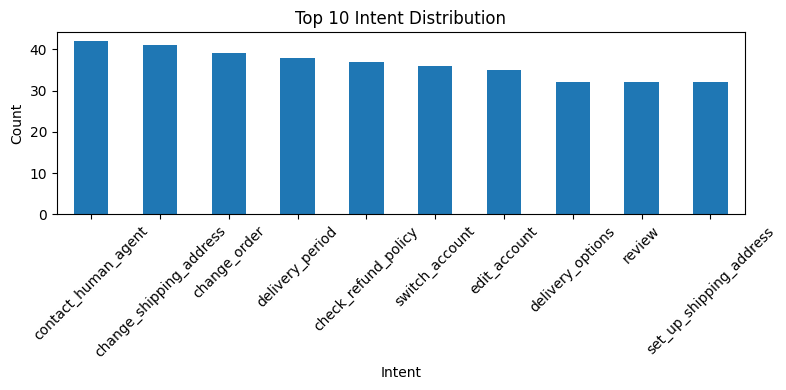

In [12]:
# visualizing the intent 
import matplotlib.pyplot as plt

intent_counts.head(10).plot(kind="bar", figsize=(8, 4))
plt.title("Top 10 Intent Distribution")
plt.xlabel("Intent")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [14]:
# Checking the text length after cleaning
# mean is for text length, min and max for no of characters
df["utterance"].str.len().describe()

count    818.000000
mean      42.564792
std       10.332719
min        8.000000
25%       36.000000
50%       43.000000
75%       51.000000
max       60.000000
Name: utterance, dtype: float64

#### Step 3 -> selecting 5 intent and keeping the required columns

In [15]:
selected_intents = [
    "contact_human_agent",
    "change_shipping_address",
    "change_order",
    "delivery_period",
    "check_refund_policy"
]

df = df[df["intent"].isin(selected_intents)]

In [17]:
df["intent"].unique()

array(['change_order', 'change_shipping_address', 'check_refund_policy',
       'contact_human_agent', 'delivery_period'], dtype=object)

In [19]:
# Kepping only required Columns and renaming it 
df = df[["utterance","intent"]]

df = df.rename(columns={
    "utterance": "text",
    "intent": "label"
})

In [20]:
df.head()

,text,label
25,I have got to change an item of an order,change_order
26,can you help me removing several items from an...,change_order
27,could you help me change an order I have made?,change_order
28,I cannot change an item of an order,change_order
29,problem with adding something,change_order


#### Step 4 -> Text Cleaning

In [21]:
import re

def clean_text(text):
    if not isinstance(text, str):
        return ""
    
    text = text.lower()
    text = text.replace("\n", " ")
    text = text.replace("\xa0", " ")
    text = re.sub(r"\s+", " ", text).strip()
    
    return text


In [23]:
# Applying the clean_text function to text in df
df["text"] = df["text"].apply(clean_text)

In [24]:
df[["text", "label"]].sample(10, random_state=18)

,text,label
417,how to check when my item is going to arrive?,delivery_period
290,want assistance to speak to someone,contact_human_agent
88,could you tell me about changing the shipping ...,change_shipping_address
203,assistance checking in what cases can i ask fo...,check_refund_policy
102,could i change the shipping address?,change_shipping_address
85,i cannot change the shipping address,change_shipping_address
65,i need assistance changing the shipping address,change_shipping_address
96,supports trying to update my shipping address,change_shipping_address
435,i would like information about the delivery pe...,delivery_period
306,i want to talk to an agent,contact_human_agent


In [25]:
df["text"].str.len().describe()

count    197.000000
mean      42.649746
std       10.482452
min       13.000000
25%       36.000000
50%       43.000000
75%       51.000000
max       60.000000
Name: text, dtype: float64

#### Step 5 -> Train/Test Split

In [26]:
X = df["text"]
y = df["label"]

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=18,stratify=y)


In [30]:
print("Train size:", X_train.shape)
print("Test size:", X_test.shape)

print("\nTrain label distribution:")
print(y_train.value_counts(normalize=True))

print("\nTest label distribution:")
print(y_test.value_counts(normalize=True))


Train size: (157,)
Test size: (40,)

Train label distribution:
label
contact_human_agent        0.210191
change_shipping_address    0.210191
change_order               0.197452
delivery_period            0.191083
check_refund_policy        0.191083
Name: proportion, dtype: float64

Test label distribution:
label
contact_human_agent        0.225
delivery_period            0.200
change_order               0.200
change_shipping_address    0.200
check_refund_policy        0.175
Name: proportion, dtype: float64


#### Step 6 -> Vectorization

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000,ngram_range=(1, 2),min_df=2,max_df=0.9)


In [32]:
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [33]:
print("Train TF-IDF shape:", X_train_tfidf.shape)
print("Test TF-IDF shape:", X_test_tfidf.shape)

Train TF-IDF shape: (157, 264)
Test TF-IDF shape: (40, 264)


In [34]:
tfidf.get_feature_names_out()[:20]

array(['about', 'about changing', 'about delivery', 'about shipping',
       'about the', 'add', 'add an', 'add some', 'adding', 'address',
       'address change', 'agent', 'am', 'am trying', 'an', 'an agent',
       'an item', 'an order', 'arrive', 'ask'], dtype=object)

#### Step 7 -> Model Training with GridSearchCV

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV

In [36]:
# Defining Models and Parameters
model_params = {
    "logistic_regression": {
        "model": LogisticRegression(
            solver="lbfgs",
            max_iter=1000
        ),
        "params": {
            "C": [0.5, 1, 10]
        }
    },
    "multinomial_nb": {
        "model": MultinomialNB(),
        "params": {
            "alpha": [0.1, 0.5, 1.0]
        }
    }
}


In [37]:
scores = []
best_model = None
best_score = -1

for model_name, mp in model_params.items():
    grid = GridSearchCV(
        estimator=mp["model"],
        param_grid=mp["params"],
        cv=5,
        scoring="f1_macro",
        n_jobs=-1
    )
    
    grid.fit(X_train_tfidf, y_train)
    
    scores.append({
        "model": model_name,
        "best_f1_macro": grid.best_score_,
        "best_params": grid.best_params_
    })
    
    if grid.best_score_ > best_score:
        best_score = grid.best_score_
        best_model = grid.best_estimator_


In [38]:
scores_df = pd.DataFrame(scores)
scores_df

,model,best_f1_macro,best_params
0,logistic_regression,1.000000,{'C': 10}
1,multinomial_nb,0.993846,{'alpha': 0.1}


#### Step 8 -> Evaluation

In [39]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = best_model.predict(X_test_tfidf)

In [40]:
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", test_accuracy)

Test Accuracy: 1.0


In [41]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
                         precision    recall  f1-score   support

           change_order       1.00      1.00      1.00         8
change_shipping_address       1.00      1.00      1.00         8
    check_refund_policy       1.00      1.00      1.00         7
    contact_human_agent       1.00      1.00      1.00         9
        delivery_period       1.00      1.00      1.00         8

               accuracy                           1.00        40
              macro avg       1.00      1.00      1.00        40
           weighted avg       1.00      1.00      1.00        40



In [42]:
confusion_matrix(y_test, y_pred)

array([[8, 0, 0, 0, 0],
       [0, 8, 0, 0, 0],
       [0, 0, 7, 0, 0],
       [0, 0, 0, 9, 0],
       [0, 0, 0, 0, 8]])

In [43]:
print("Train Accuracy:", accuracy_score(y_train, best_model.predict(X_train_tfidf)))

Train Accuracy: 1.0


In [52]:
ex_sent = [
    "I need to modify the items in my recent order",
    "Can you explain when I am eligible for a refund?",
    "I want to speak with a live customer support agent"
]


In [53]:
cleaned_sentences = [clean_text(s) for s in ex_sent]

In [54]:
test_tfidf = tfidf.transform(cleaned_sentences)

In [55]:
predicted_label = best_model.predict(test_tfidf)
print("Predicted intent:", predicted_label[0])

Predicted intent: change_order


In [56]:
predictions = best_model.predict(test_tfidf)

for sent, pred in zip(ex_sent, predictions):
    print(f"Sentence: {sent}")
    print(f"Predicted intent: {pred}")
    print("-" * 50)


Sentence: I need to modify the items in my recent order
Predicted intent: change_order
--------------------------------------------------
Sentence: Can you explain when I am eligible for a refund?
Predicted intent: check_refund_policy
--------------------------------------------------
Sentence: I want to speak with a live customer support agent
Predicted intent: contact_human_agent
--------------------------------------------------


#### Step 9 -> model saving 

In [57]:
import joblib
joblib.dump(best_model,"smart_text_classification.joblib")

['smart_text_classification.joblib']

In [58]:
joblib.dump(tfidf, "tfidf_vectorizer.joblib")

['tfidf_vectorizer.joblib']

In [59]:
joblib.dump(best_model.classes_, "label_classes.joblib")

['label_classes.joblib']

In [60]:
# loading the model and checking 
loaded_model = joblib.load("smart_text_classification.joblib")
loaded_tfidf = joblib.load("tfidf_vectorizer.joblib")

test_sentence = "I want to talk to a live agent"
cleaned = clean_text(test_sentence)
pred = loaded_model.predict(loaded_tfidf.transform([cleaned]))
print(pred[0])


contact_human_agent
